# Latent Representation Preparation

Import Packages 

In [ ]:
import pandas as pd
import numpy as np
import json
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Import Item Representation from ALS

In [ ]:
test_dir = '/content/gdrive/My Drive/BD/ALS_5_0.1/'
rank100 = '/content/gdrive/My Drive/DS1004_Project_data/ALS_100_0.01_15_test/'
rank250 = '/content/gdrive/My Drive/DS1004_Project_data/ALS_250_0.01_30_test/'
rank500 = '/content/gdrive/My Drive/DS1004_Project_data/ALS_500_0.01_30_test/'

In [ ]:
##################change rank_n for number of ALS rank parameter
rank_n = 500
folder_dir = rank500
ALS_rank = np.arange(rank_n)

In [ ]:
concat = False
for path in os.listdir(os.path.join(folder_dir, 'itemFactors')):
    if 'part' in path:
        if not concat:
            item = pd.read_parquet(os.path.join(folder_dir, 'itemFactors', path))
            concat = True
        else:
            item = pd.concat([item, pd.read_parquet(os.path.join(folder_dir,'itemFactors', path))])
            
# concat = False
# for path in os.listdir(os.path.join(folder_dir, 'userFactors')):
#     if 'part' in path:
#         if not concat:
#             user = pd.read_parquet(os.path.join(folder_dir, 'userFactors', path))
#             concat = True
#         else:
#             user = pd.concat([item, pd.read_parquet(os.path.join(folder_dir,'userFactors', path))])

In [ ]:
item_fac = pd.DataFrame(item['features'].tolist(), index = item.index)
item_fac['id'] = item['id']

In [ ]:
# tag = pd.read_csv('/content/gdrive/My Drive/BD/ml-latest/tags.csv')
gen_score = pd.read_csv('/content/gdrive/My Drive/BD/ml-latest/genome-scores.csv')
ratings = pd.read_csv('/content/gdrive/My Drive/BD/ml-latest/ratings.csv')

Add Genre Tag by Maximum Relevance of Genre to Each Movie

In [ ]:
idx =  gen_score.groupby(['movieId'])['relevance'].transform(max) == gen_score['relevance']
gen_score = gen_score[idx]
dup_indx = gen_score['movieId'].duplicated()
check_dup = gen_score[dup_indx] #duplicate：ties in relevance score 
gen_score = gen_score.drop_duplicates('movieId', keep = 'first')
item_fac = item_fac.merge(gen_score, left_on = 'id', right_on = 'movieId', how = 'left') #each movie has multiple tags 

In [ ]:
tag = pd.read_csv('/content/gdrive/My Drive/BD/ml-latest/genome-tags.csv')

In [ ]:
tag.head(50)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
9,10,19th century


In [ ]:
gen_score

,movieId,tagId,relevance
1035,1,1036,0.99950
1156,2,29,0.97800
3156,3,901,0.97000
4499,4,1116,0.97625
4962,5,451,0.96925
...,...,...,...
14857607,185435,720,0.88750
14858792,185585,777,0.76700
14860142,186587,999,0.91875
14861058,187593,787,0.85325


Add Popolarity Tag by Median Ratings

In [ ]:
ratings = ratings.groupby(['movieId']).agg({'rating':'median'}) #find median ratings for each movie
item_fac = item_fac.merge(ratings['rating'], left_on = 'id', right_on = 'movieId', how = 'left') #each movie has multiple tags 
item_fac = item_fac.rename(columns = {'rating':'median rating'})

In [ ]:
item_fac

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,id,movieId,tagId,relevance,median rating
0,-0.244631,0.101162,0.058659,0.081954,0.131672,-0.145538,0.106061,0.127012,-0.082202,0.020721,...,0.128191,0.165714,-0.193002,-0.234734,0.115825,2,2.0,29.0,0.97800,3.00
1,0.114968,0.016907,-0.143347,-0.089461,0.295700,-0.169651,0.192462,0.201144,0.091494,0.123441,...,0.122267,0.021867,-0.471927,0.010467,-0.176532,12,12.0,958.0,0.99250,3.00
2,0.058950,0.128532,-0.186299,0.179614,0.073021,-0.198869,-0.070692,-0.103524,-0.364255,0.052843,...,0.075549,0.224547,-0.084553,0.040015,0.284164,22,22.0,903.0,0.99825,3.00
3,0.137515,0.034372,-0.109230,0.073180,-0.197373,-0.310234,-0.124671,0.055874,-0.283033,-0.003534,...,0.123196,0.061499,-0.078356,-0.241384,0.148203,32,32.0,337.0,0.99875,4.00
4,-0.037813,0.115621,-0.166300,-0.047155,-0.004439,-0.183195,-0.154356,0.125540,0.055382,-0.002923,...,-0.176485,0.059954,-0.060869,0.045722,0.130477,42,42.0,498.0,0.94625,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43015,-0.058092,0.050553,-0.032049,-0.053714,0.029245,-0.104130,-0.032258,0.029991,-0.117698,0.148243,...,0.196397,0.091991,-0.117152,-0.025518,-0.068842,193799,NaN,NaN,NaN,4.50
43016,0.013007,-0.018623,0.007945,0.006796,-0.018737,-0.004391,-0.005145,0.056794,0.000675,-0.001560,...,0.023047,0.004898,-0.026392,-0.005693,-0.002267,193809,NaN,NaN,NaN,2.00
43017,0.013007,-0.018623,0.007945,0.006796,-0.018737,-0.004391,-0.005145,0.056794,0.000675,-0.001560,...,0.023047,0.004898,-0.026392,-0.005693,-0.002267,193819,NaN,NaN,NaN,2.00
43018,0.013007,-0.018623,0.007945,0.006796,-0.018737,-0.004391,-0.005145,0.056794,0.000675,-0.001560,...,0.023047,0.004898,-0.026392,-0.005693,-0.002267,193829,NaN,NaN,NaN,2.00


# Dimension Reduction

**PCA** 
Initial reduction to a reasonable amount (e.g. 50) 

In [ ]:
pca = PCA(n_components=90)
pca_res = pca.fit_transform(item_fac[ALS_rank].values)
item_fac['pca_1'] = pca_res[:,0]
item_fac['pca_2'] = pca_res[:,1] 
item_fac['pca_3'] = pca_res[:,2]

pca.explained_variance_ratio_

Explained variation per principal component: [0.04340087 0.02723068 0.02452143 0.02121522 0.01794395 0.01591998
 0.01476136 0.01363768 0.01343333 0.01321579 0.01240636 0.01220405
 0.01202115 0.01173298 0.01116005 0.01082998 0.01070025 0.01054205
 0.01039475 0.0103696  0.01027346 0.01020403 0.01010327 0.01007455
 0.00997834 0.0099186  0.00977089 0.00971744 0.00960726 0.00954699
 0.00950737 0.00945376 0.00943975 0.00937787 0.00931923 0.0092846
 0.00924692 0.00920165 0.00917403 0.00913169 0.00907028 0.00904415
 0.0090028  0.00897433 0.00893918 0.0089217  0.00887854 0.00885637
 0.00882202 0.00877127 0.00876527 0.00874561 0.0086931  0.0086523
 0.00862962 0.00860503 0.00859522 0.00853124 0.00849916 0.00846179
 0.00844728 0.00841126 0.00837588 0.00835507 0.00833429 0.00831804
 0.00828658 0.00827231 0.00823669 0.00818849 0.00815972 0.00813323
 0.00807167 0.00805646 0.00803379 0.00799994 0.00796201 0.00793783
 0.0079047  0.00788126 0.00784425 0.00782406 0.00779803 0.00774803
 0.00773759 0.00773

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9260698

**T-distributed Stochastic Neighbor Embedding**

In [ ]:
import time
tsne = TSNE(n_components=2, perplexity=30, learning_rate = 'auto', n_iter=1000,  n_iter_without_progress = 100, init='pca', verbose=1)
%time tsne_results = tsne.fit_transform(item_fac[ALS_rank].values)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 43020 samples in 0.025s...
[t-SNE] Computed neighbors for 43020 samples in 120.539s...
[t-SNE] Computed conditional probabilities for sample 1000 / 43020
[t-SNE] Computed conditional probabilities for sample 2000 / 43020
[t-SNE] Computed conditional probabilities for sample 3000 / 43020
[t-SNE] Computed conditional probabilities for sample 4000 / 43020
[t-SNE] Computed conditional probabilities for sample 5000 / 43020
[t-SNE] Computed conditional probabilities for sample 6000 / 43020
[t-SNE] Computed conditional probabilities for sample 7000 / 43020
[t-SNE] Computed conditional probabilities for sample 8000 / 43020
[t-SNE] Computed conditional probabilities for sample 9000 / 43020
[t-SNE] Computed conditional probabilities for sample 10000 / 43020
[t-SNE] Computed conditional probabilities for sample 11000 / 43020
[t-SNE] Computed conditional probabilities for sample 12000 / 43020
[t-SNE] Computed conditional probabilities for s

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 109.894394
[t-SNE] KL divergence after 1000 iterations: 3.200009
CPU times: user 25min 30s, sys: 21.5 s, total: 25min 51s
Wall time: 15min 19s


In [ ]:
item_fac['tsne_x'] = tsne_results[:,0]
item_fac['tsne_y'] = tsne_results[:,1]

Text(0.5, 1.0, 't-SNE Colored by Movie Popularity (median ratings)')

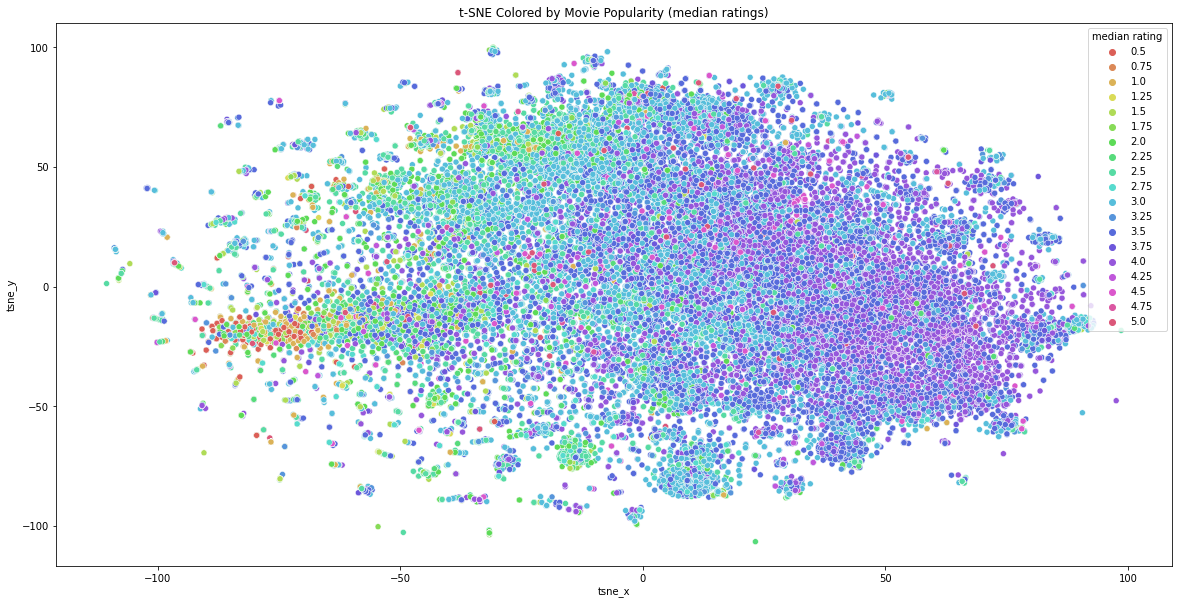

In [ ]:
#palette choice: ‘husl’ or ‘hls’, ch:<cubehelix arguments>’, ‘light:<color>’, ‘dark:<color>’, ‘blend:<color>,<color>’,'pastel'
plt.figure(figsize=(20,10))
sns.scatterplot(data=item_fac,x="tsne_x", y="tsne_y",
    # hue = 'tagId',
    # palette = sns.color_palette("hls",item_fac['tagId'].nunique()),
    hue = 'median rating',
    # palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True),
    palette = sns.color_palette('hls',item_fac['median rating'].nunique()),
)
plt.title('t-SNE Colored by Movie Popularity (median ratings)')

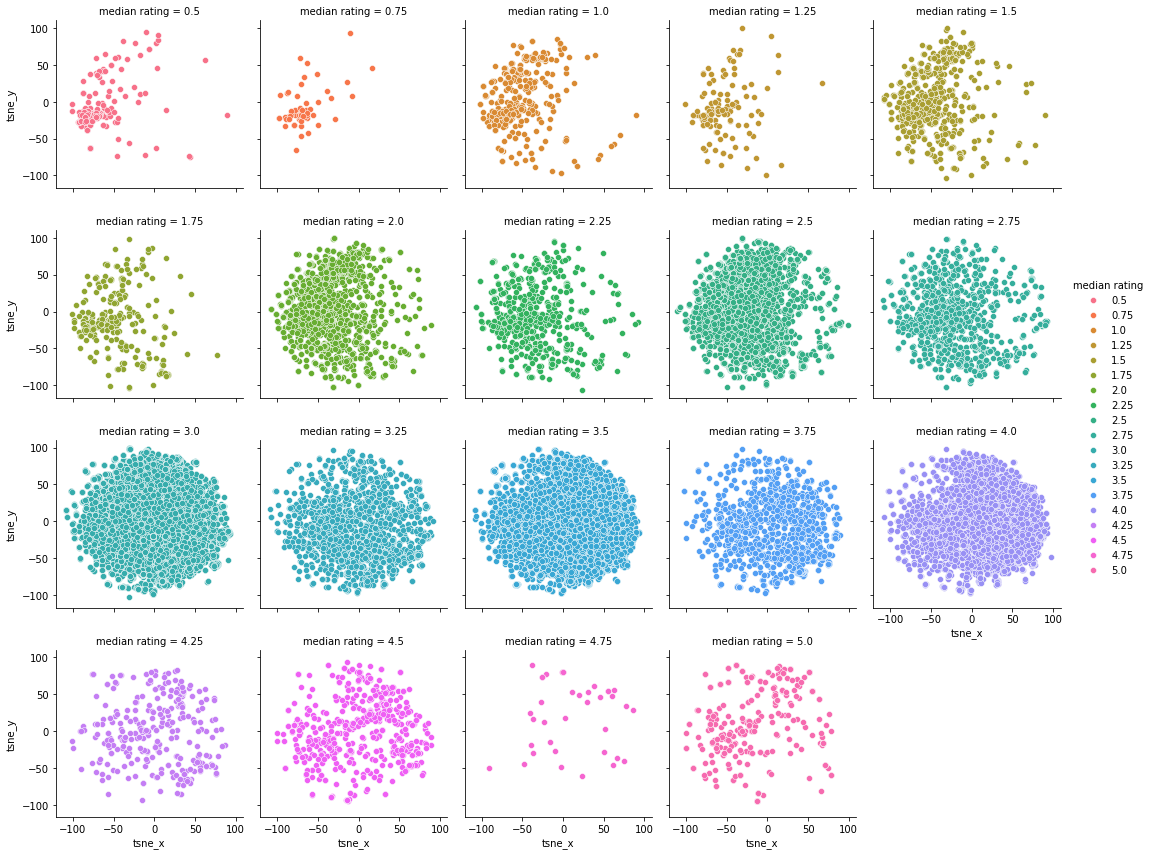

In [ ]:
grid = sns.FacetGrid(item_fac, col = 'median rating', hue = 'median rating',col_wrap = 5)
grid.map(sns.scatterplot, 'tsne_x', 'tsne_y', palette = sns.color_palette('hls',item_fac['median rating'].nunique()))
grid.add_legend()
plt.show()

In [ ]:
import time
tsne3 = TSNE(n_components=3, perplexity=40, learning_rate = 'auto', n_iter=1000,  n_iter_without_progress = 100, init='pca', verbose=2)
%time tsne3_results = tsne3.fit_transform(item_fac[ALS_rank].values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 43020 samples in 0.013s...
[t-SNE] Computed neighbors for 43020 samples in 72.853s...
[t-SNE] Computed conditional probabilities for sample 1000 / 43020
[t-SNE] Computed conditional probabilities for sample 2000 / 43020
[t-SNE] Computed conditional probabilities for sample 3000 / 43020
[t-SNE] Computed conditional probabilities for sample 4000 / 43020
[t-SNE] Computed conditional probabilities for sample 5000 / 43020
[t-SNE] Computed conditional probabilities for sample 6000 / 43020
[t-SNE] Computed conditional probabilities for sample 7000 / 43020
[t-SNE] Computed conditional probabilities for sample 8000 / 43020
[t-SNE] Computed conditional probabilities for sample 9000 / 43020
[t-SNE] Computed conditional probabilities for sample 10000 / 43020
[t-SNE] Computed conditional probabilities for sample 11000 / 43020
[t-SNE] Computed conditional probabilities for sample 12000 / 43020
[t-SNE] Computed conditional probabilities for s

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] Iteration 50: error = 103.5399017, gradient norm = 0.0175514 (50 iterations in 216.702s)
[t-SNE] Iteration 100: error = 104.3230438, gradient norm = 0.0151044 (50 iterations in 163.034s)
[t-SNE] Iteration 150: error = 104.5557098, gradient norm = 0.0130164 (50 iterations in 178.060s)
[t-SNE] Iteration 200: error = 105.0844116, gradient norm = 0.0078018 (50 iterations in 159.334s)
[t-SNE] Iteration 250: error = 105.3912506, gradient norm = 0.0049449 (50 iterations in 178.976s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 105.391251
[t-SNE] Iteration 300: error = 4.1788898, gradient norm = 0.0005552 (50 iterations in 211.073s)
[t-SNE] Iteration 350: error = 3.5998342, gradient norm = 0.0001874 (50 iterations in 207.158s)
[t-SNE] Iteration 400: error = 3.3054724, gradient norm = 0.0001232 (50 iterations in 204.763s)
[t-SNE] Iteration 450: error = 3.1224983, gradient norm = 0.0000952 (50 iterations in 207.582s)
[t-SNE] Iteration 500: error = 3.0047956, gradie

In [ ]:
tsne3_results

array([[  2.5716183 ,  33.814804  ,  -6.091578  ],
       [ 11.074138  ,  18.027596  , -15.125278  ],
       [ 19.745188  ,  35.526585  ,   3.416631  ],
       ...,
       [  0.16590215,   3.0905511 ,  18.91959   ],
       [-48.720673  ,  15.59564   ,  14.938331  ],
       [ 13.73242   , -41.418766  , -22.778788  ]], dtype=float32)

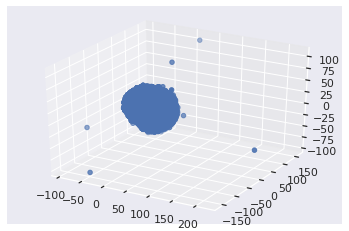

In [ ]:
fig = plt.figure()
sns.set(style = 'darkgrid')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne3_results[:,0], tsne3_results[:,1], tsne3_results[:,2])

In [ ]:
pip install umap-learn

     |████████████████████████████████| 88 kB 4.2 MB/s 
     |████████████████████████████████| 1.1 MB 22.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=f2e9eba84f746e7b6d839495ca689e7af635ff68bb133a1c6e56a1311e1b30f3
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=208c1db6bfec1f8c3d31afac9aaedd148bca6ac95c2b435f388ebf978d518785
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
import umap

In [ ]:
umap_fit = umap.UMAP(n_neighbors = 200, min_dist = 0.8, n_components=2, metric = 'euclidean')
%time umap_results = umap_fit.fit_transform(item_fac[ALS_rank].values)

CPU times: user 12min 58s, sys: 12.2 s, total: 13min 10s
Wall time: 7min 4s


Text(0.5, 1.0, 'UMAP Embedding Colored by Movie Popularity (median ratings)')

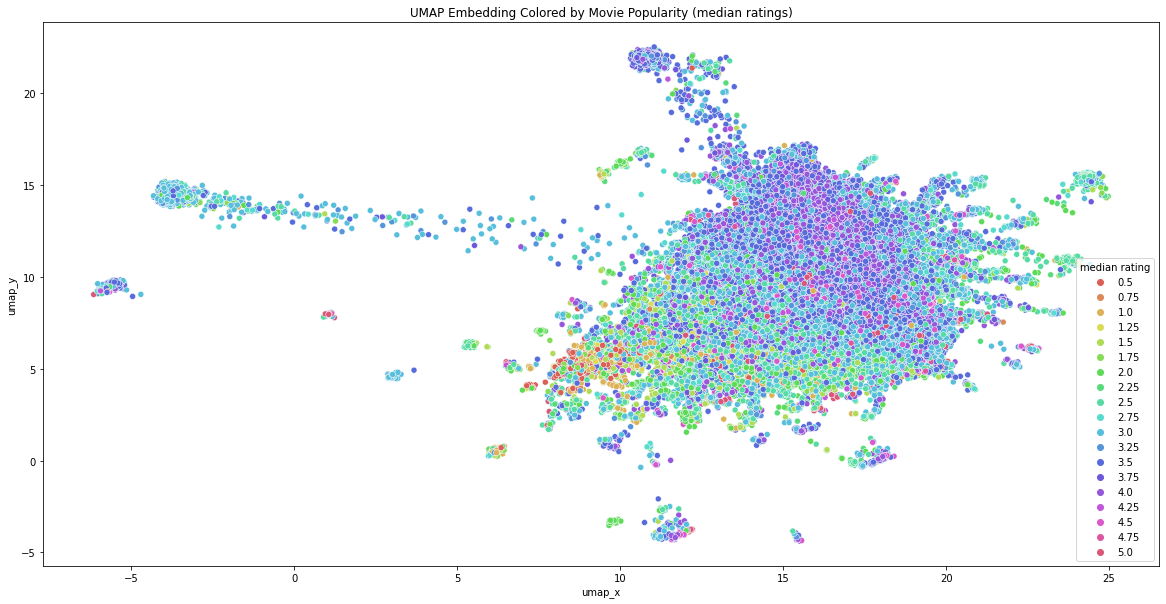

In [ ]:
item_fac['umap_x'] = umap_results[:,0]
item_fac['umap_y'] = umap_results[:,1]
plt.figure(figsize=(20,10))
sns.scatterplot(
    x="umap_x", y="umap_y",data=item_fac,
    # hue = 'tagId',
    # palette = sns.color_palette("hls",item_fac['tagId'].nunique()),
    hue = 'median rating',
    # palette = sns.color_palette("flare", as_cmap=True),
    palette = sns.color_palette('hls',item_fac['median rating'].nunique()),
)
plt.title('UMAP Embedding Colored by Movie Popularity (median ratings)')

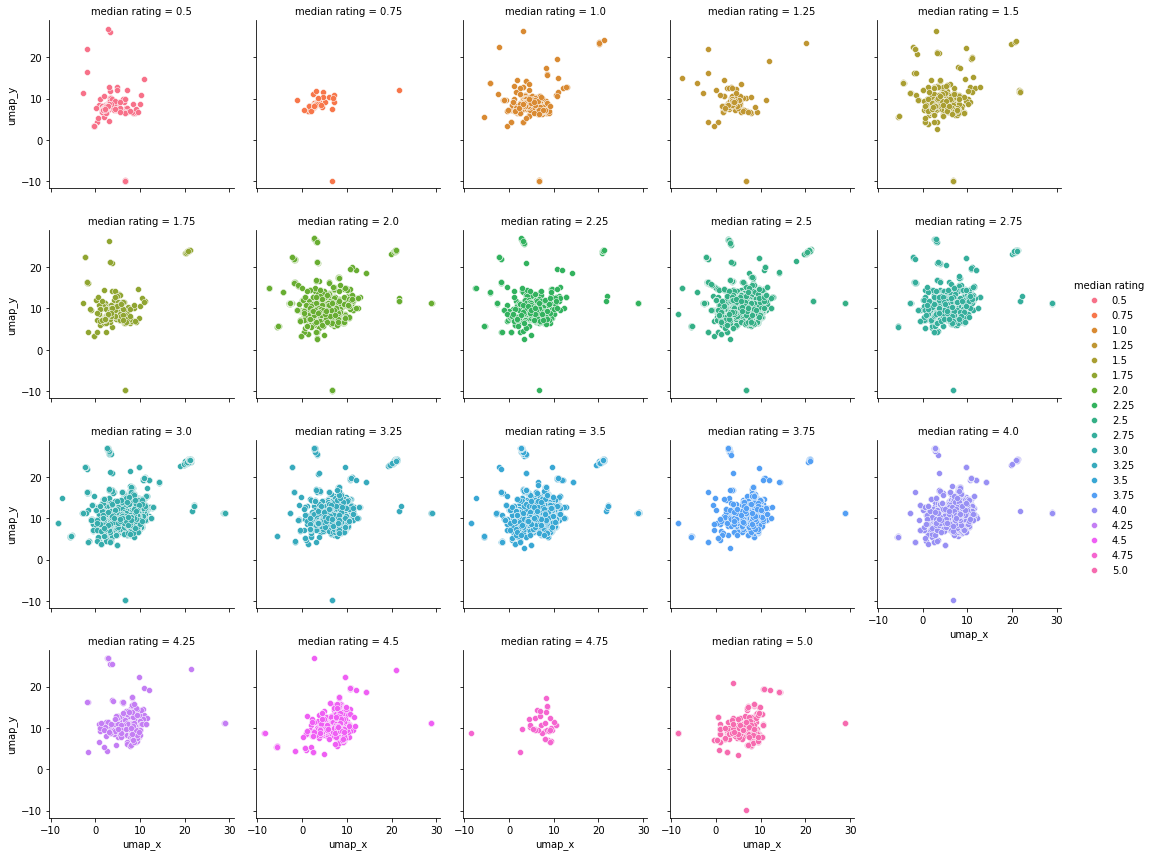

In [ ]:
grid = sns.FacetGrid(item_fac, col = 'median rating', hue = 'median rating',col_wrap = 5)
grid.map(sns.scatterplot, 'umap_x', 'umap_y', palette = sns.color_palette('hls',item_fac['median rating'].nunique()))
grid.add_legend()
plt.show()